<a href="https://colab.research.google.com/github/Vanisha2005/SCT_DS_2/blob/main/Copy_of_Task_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Show plots inline
%matplotlib inline


In [20]:
import os

# List files in /content directory
os.listdir('/content')


['.config', 'titanic.zip', 'titanic_data', 'sample_data']

In [21]:
import zipfile

zip_path = '/content/titanic.zip'
extract_to = '/content/titanic_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# List extracted files
os.listdir(extract_to)


['test.csv', 'gender_submission.csv', 'train.csv']

In [22]:
df = pd.read_csv('/content/titanic_data/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# Basic structure
df.info()

# Summary statistics
df.describe()

# Count missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Survived', ylabel='count'>

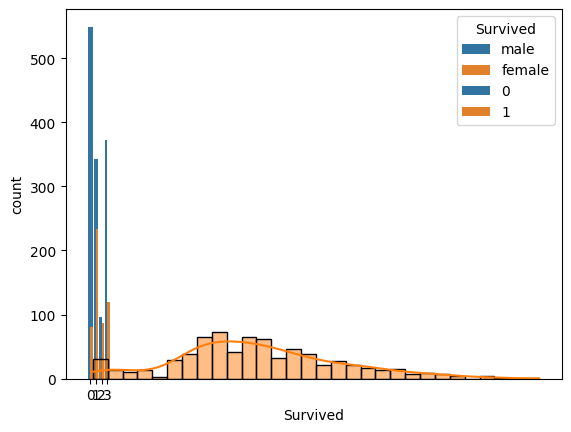

In [24]:
# 1. Survival count
sns.countplot(x='Survived', data=df)

# 2. Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)

# 3. Survival by class
sns.countplot(x='Pclass', hue='Survived', data=df)

# 4. Age distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)


Text(0.5, 1.0, 'Correlation Heatmap')

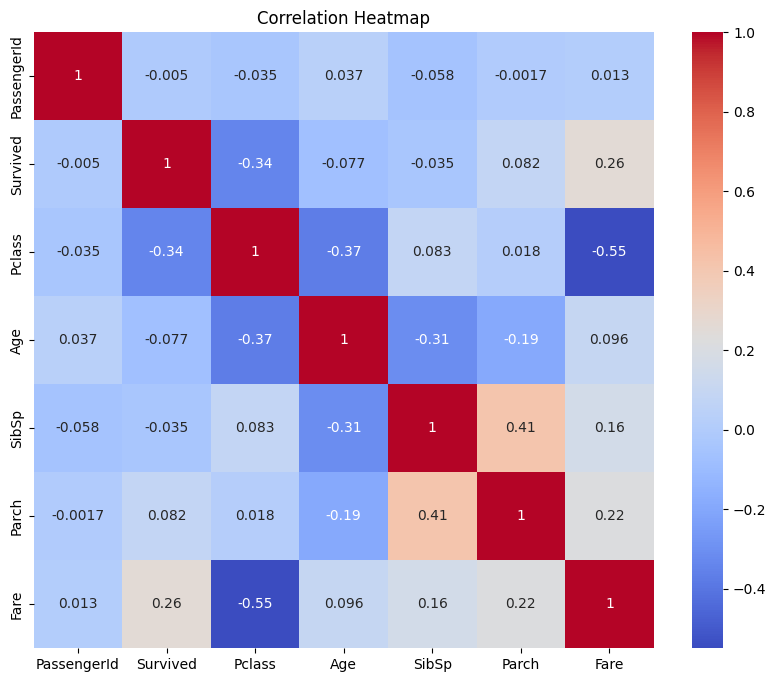

In [25]:
# Only numeric columns
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


## 🔍 Summary of Key Insights:

- Females had a higher survival rate than males.
- 1st Class passengers had the highest survival rate.
- Younger passengers (children) survived more often.
- Cabin column was removed due to too many missing values.
- 'Sex' and 'Pclass' are highly correlated with survival.
